# NLP21@BGU.CS - HW1

## Zvika Haramaty zvikah@post.bgu.ac.il
## Daniel Kuvachev (?) yourmail@...
### NLP 2021 - HW1 (http://www.cs.bgu.ac.il/~elhadad/nlp21/hw1.html)

Nov 2020

In [228]:
# Boring preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dani\miniconda3\envs\nlp21\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['hist', 'e', 'f', 'text', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<h2>Content</h2>

* <a href="#P1">Part 1: Language Models</a>
  * <a href="#data">1.1 Data Exploration</a>
    * <a href="#explore">1.1.1 Gathering basic statistics</a>
    * <a href="#power">1.1.2 Zipf and Power Law</a>
  * <a href="#ngram">1.2 n-gram model</a>
    * <a href="#n_parameters">1.2.1 How much memory do you expect a model to occupy?</a>
    * <a href="#train_lm">1.2.2 N-gram Word LM</a>
  * <a href="#eval">1.3 Language Model Evaluation</a>
    * <a href="#per">1.3.1 Perplexity</a>
    * <a href="#smoothing">1.3.2 Smoothing</a>
    * <a href="#overfit">1.3.3 Perplexity according to the order of the n-gram model
    * <a href="#test-lm">1.3.4 Test the best n-gram LM</a>
    * <a href="#gen">1.3.5 Generating Text using Language Models</a>
  * <a href="#nn-lm">1.4 Character language model</a>
    * <a href="#effectiveness">1.4.1 Read and Summarize</a>
    * <a href="#recipes">1.4.2 Recipes with a Character LM</a>
* <a href="#P2">Part 2: Polynomial curve fitting</a>
  * <a href="#syntheticdata">2.1 Synthetic data generation</a>
  * <a href="#curvefitting">2.2 Polynomial Curve Fitting</a>
  * <a href="#regularization">2.3 Polynomial Curve Fitting with Regularization</a>
  * <a href="#prob-regr">2.4 Probabilistic Regression Model</a>
* <a href="#P3">Part 3: Text Classification with Character RNN</a>
  * <a href="#readtut">3.1 Summarize the PyTorch Tutorial</a>
  * <a href="#newdata">3.2 Explore the Cities Dataset</a>
  * <a href="#citiesmodel">3.3 Train and Evaluate the RNN Model for Cities</a>
  * <a href="#bettercitiesmodel">3.4 (Optional) Improve the Model</a>

<hr>
<a name="P1"></a>
<h2>Part 1: Language Models</h2>

<a name="data"></a>
<h3>1.1 Data Exploration</h3>

<a name="explore"></a>
<h4>1.1.1 Gathering Basic Statistics</h4>

In this section, we collect and plot the following information on a text dataset:
<ul>
<li>The total number of tokens</li>
<li>The total number of characters</li>
<li>The total number of distinct words (vocabulary)</li>
<li>The total number of tokens corresponding to the top-N most frequent words in the vocabulary</li>
<li>The token/type ratio in the dataset</li>
<li>The number of types that appear in the dev data but not the training data</li>
<li>The average number and standard deviation of characters per token</li>
<li>The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4.</li>
<li>The total number of distint n-grams of characters that appear for n=2,3,4,5,6,7.</li>
</ul>

We operate on the PTB dataset, which contains 929k training words, 73k validation words, and 82k test words. 
It is formatted in such a way that only the top 10k most frequent words are in its vocabulary.

We gather the files from <a href="http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz">the dataset</a>
where sentences are segmented one per line and words separated by spaces.  We assume the files are located in "../data/".

#### Tokenizing

You may need to tokenize strings read from the dataset files into lists of tokens.  

Think which method is best appropriate for this dataset given the way it is formatting.
Recall the method based on regular expressions used in Norvig's piece.
Compare it with the the tokenizer provided in the nltk library.

In [229]:
import nltk
nltk.download('punkt')

text = "Won't this be tokenized, the way PTB expects it to be."
tokens = nltk.word_tokenize(text)
print(tokens)

print("We found %s tokens" % (len(tokens)))

['Wo', "n't", 'this', 'be', 'tokenized', ',', 'the', 'way', 'PTB', 'expects', 'it', 'to', 'be', '.']
We found 14 tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The output of justext is organized in paragraphs.  We converted them as one line of text each.

Note how abbreviations in English are tokenized in PTB ("I'm" becomes ["I", "'m"]) and numbers are all replaced by the "N" special token.

we will now observe the ptb dataset , first we will load the train, validation and test words and tokenize them.
we know that this dataset have been preproccesed so there are only 10k most frequent words.
in the dataset there are 929k training words, 73k validation words and 82k test words.

In [230]:
import os

train_text = open(os.path.join(os.getcwd(), "..\data\ptb.train.txt")).read()
train_tokens = nltk.word_tokenize(train_text)
print("we found {num} tokens in train".format(num=len(train_tokens)))
print(train_tokens[:100])

we found 978754 tokens in train
['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', 'pierre', '<', 'unk', '>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', 'mr.', '<', 'unk', '>', 'is', 'chairman', 'of', '<', 'unk', '>', 'n.v.', 'the', 'dutch', 'publishing', 'group', 'rudolph', '<', 'unk', '>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths']


we can see that the word tokinizer isn't working as expected , we want the <unk> words to be marked as 1 token and not as 3 , we will use white space tokenizer for that task

In [231]:
from nltk.tokenize import WhitespaceTokenizer

tokenizer = WhitespaceTokenizer()
train_tokens = tokenizer.tokenize(train_text)
print(train_tokens[:100])
print("we found {num} tokens in train".format(num=len(train_tokens)))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', 'to', 'it']
we found 887521 tokens in train


we can see that the number of tokens is sagnifintcly smaller than before , abd we can see that we got reed of '<' , '>'.
we will use this method in the other datasets as well.

In [232]:
valid_text = open(os.path.join(os.getcwd(), "..\data\ptb.valid.txt")).read()
valid_tokens = tokenizer.tokenize(valid_text)
print(valid_tokens[:100])
print("we found {num} tokens in valid dataset".format(num=len(valid_tokens)))

test_text = open(os.path.join(os.getcwd(), "..\data\ptb.test.txt")).read()
test_tokens = tokenizer.tokenize(test_text)
print(test_tokens[:100])
print("we found {num} tokens in test dataset".format(num=len(test_tokens)))

['consumers', 'may', 'want', 'to', 'move', 'their', 'telephones', 'a', 'little', 'closer', 'to', 'the', 'tv', 'set', '<unk>', '<unk>', 'watching', 'abc', "'s", 'monday', 'night', 'football', 'can', 'now', 'vote', 'during', '<unk>', 'for', 'the', 'greatest', 'play', 'in', 'N', 'years', 'from', 'among', 'four', 'or', 'five', '<unk>', '<unk>', 'two', 'weeks', 'ago', 'viewers', 'of', 'several', 'nbc', '<unk>', 'consumer', 'segments', 'started', 'calling', 'a', 'N', 'number', 'for', 'advice', 'on', 'various', '<unk>', 'issues', 'and', 'the', 'new', 'syndicated', 'reality', 'show', 'hard', 'copy', 'records', 'viewers', "'", 'opinions', 'for', 'possible', 'airing', 'on', 'the', 'next', 'day', "'s", 'show', 'interactive', 'telephone', 'technology', 'has', 'taken', 'a', 'new', 'leap', 'in', '<unk>', 'and', 'television', 'programmers', 'are', 'racing', 'to', 'exploit']
we found 70390 tokens in valid dataset
['no', 'it', 'was', "n't", 'black', 'monday', 'but', 'while', 'the', 'new', 'york', 'stoc

we will now load the Shakespeare data set , we can see that this dataset was not preprocessed so we need to tokenize the words difrrently because we will also get spieciel chars as tokens(like '.').
we also expect this set to be smaller then our train dataset but this is not mendatory , somtimes test datasets are larger then the train ones.

In [233]:
shake_test_text = open(os.path.join(os.getcwd(), "..\data\shakespeare.txt")).read()
shake_test_tokens = tokenizer.tokenize(shake_test_text)
print("we found {num} tokens in shakesphere dataset".format(num=len(shake_test_tokens)))
print(shake_test_tokens[:100])

we found 832301 tokens in shakesphere dataset
['First', 'Citizen:', 'Before', 'we', 'proceed', 'any', 'further,', 'hear', 'me', 'speak.', 'All:', 'Speak,', 'speak.', 'First', 'Citizen:', 'You', 'are', 'all', 'resolved', 'rather', 'to', 'die', 'than', 'to', 'famish?', 'All:', 'Resolved.', 'resolved.', 'First', 'Citizen:', 'First,', 'you', 'know', 'Caius', 'Marcius', 'is', 'chief', 'enemy', 'to', 'the', 'people.', 'All:', 'We', "know't,", 'we', "know't.", 'First', 'Citizen:', 'Let', 'us', 'kill', 'him,', 'and', "we'll", 'have', 'corn', 'at', 'our', 'own', 'price.', "Is't", 'a', 'verdict?', 'All:', 'No', 'more', 'talking', "on't;", 'let', 'it', 'be', 'done:', 'away,', 'away!', 'Second', 'Citizen:', 'One', 'word,', 'good', 'citizens.', 'First', 'Citizen:', 'We', 'are', 'accounted', 'poor', 'citizens,', 'the', 'patricians', 'good.', 'What', 'authority', 'surfeits', 'on', 'would', 'relieve', 'us:', 'if', 'they', 'would']


we will now calculate the total number of chars in the ptb dataset , we expect the number of chars to be signifintly more than the number of words in each dataset, we expect that number to be bounded to biggest_word * number_of_words.

In [234]:
def split_words(words):
    chars = []
    for word in words:
        for char in word:
            chars.append(char)
    return chars

train_char_tokens = split_words(train_tokens)
print("we found {num} tokens".format(num=len(train_char_tokens)))

we found 4129961 tokens


In [235]:
shake_char_tokens = split_words(shake_test_tokens)
print("we found {num} tokens".format(num=len(shake_char_tokens)))

we found 3709942 tokens


we will know calculate the total number of disticnt words in the dataset, we know that the ptb dataset was preprocced so it will only containt the 10k most frequent words so that's what we expect to find there.
but in the shekspere dataset we didn't run such preprocess so we cant predict how much words are there in that data set but we can be sure it isn't larger then the entire dataset size which was 855k words.
in order to get the disticnt number of words we will just use the set object of python which provide uniquness to each word, and then we will check is size.

In [236]:
disticnt_words_train = set(train_tokens)
disticnt_words_valid = set(valid_tokens)
disticnt_words_test = set(test_tokens)
disticnt_words_shake = set(shake_test_tokens)

print("we found {num} words in the train".format(num=len(disticnt_words_train)))
print("we found {num} words in the valid".format(num=len(disticnt_words_valid)))
print("we found {num} words in the test".format(num=len(disticnt_words_test)))
print("we found {num} words in shakesphere dataset".format(num=len(disticnt_words_shake)))

we found 9999 words in the train
we found 6021 words in the valid
we found 6048 words in the test
we found 62983 words in shakesphere dataset


In [237]:
print('number of words which are diffrent in the train and valid {}'.format(len(disticnt_words_train.symmetric_difference(disticnt_words_valid))))
print('number of words which are diffrent in the train and test {}'.format(len(disticnt_words_train.symmetric_difference(disticnt_words_test))))
print('number of words which are diffrent in the train and shakesphere {}'.format(len(disticnt_words_train.symmetric_difference(disticnt_words_shake))))

number of words which are diffrent in the train and valid 3978
number of words which are diffrent in the train and test 3951
number of words which are diffrent in the train and shakesphere 64516


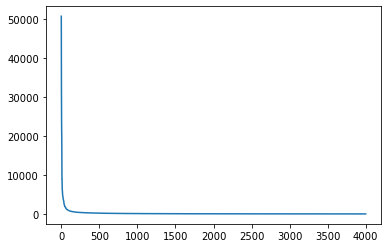

In [238]:
import collections
most_frequent_words = collections.Counter(train_tokens)
plt.plot([val for word,val in most_frequent_words.most_common(4000)])

In [239]:
average_tokens_per_type = sum([freq for freq in most_frequent_words.values()]) / len(most_frequent_words)
print('the average tokens per type in the dataset is {}'.format(average_tokens_per_type))

the average tokens per type in the dataset is 88.76097609760976


In [240]:
std_token_per_type = np.std([freq for freq in most_frequent_words.values()])
print('the std tokens per type in the dataset is {}'.format(std_token_per_type))

the std tokens per type in the dataset is 940.1980030300945


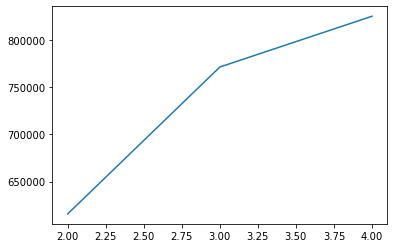

In [241]:
ngrams = []
for n in range(2,5):
    ngrams.append(len(set((tuple(train_tokens[i : i + n]), train_tokens[i + n]) for i in range(len(train_tokens) - n))))
plt.plot([i for i in range(2,5)], ngrams)

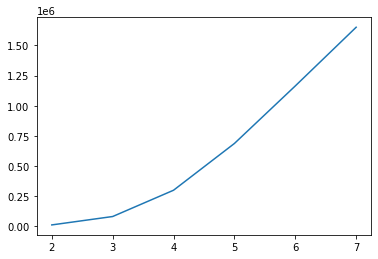

In [242]:
char_ngrams = []
for n in range(2,8):
    char_ngrams.append(len(set((tuple(train_char_tokens[i : i + n]), train_char_tokens[i + n]) for i in range(len(train_char_tokens) - n))))
plt.plot([i for i in range(2,8)], char_ngrams)

<a name="power"></a>
<h4>1.1.2 Zipf and Power Law</h4>

Word count distributions are said to follow <a href="https://en.wikipedia.org/wiki/Power_law">power law distributions</a>. 
In practice, this means that a plot of the log-frequency against the log-rank is nearly linear. 
We will verify that this holds for the Penn Treebank dataset by constructing the appropriate corpus_counts counter:


In [243]:
tokens = train_tokens
corpus_counts = Counter(tokens)

3.3.2


Text(0, 0.5, 'frequency')

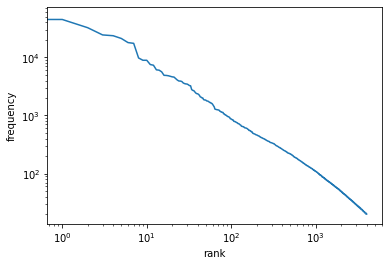

In [244]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)

plt.loglog([val for word,val in corpus_counts.most_common(4000)])
plt.xlabel('rank')
plt.ylabel('frequency')

<a name="ngram"></a>
<h3><a name="ngram">1.2 n-gram Word Language Model</a></h3>

<a name="n_parameters"></a>
<h4>1.2.1 How much memory do you expect a model to occupy?</h4>

i think the model will occupy number_of_words ^ N , and since he have 10k words the model should oocupy 10K ^ N


<a name="train_lm"></a>
<h4>1.2.2 N-gram LM</h4>

We present a Python function to construct a word n-gram model given a dataset according to the signature:
<pre>
train_word_lm(dataset, n=2)
</pre>

we assume that the dataset was allready tokenized before

In [245]:
def add_padding(dataset, n=2):
    return ['*' for i in range(n)] + dataset

def prepare_dataset(dataset, n=2):
    dataset_with_padding  = add_padding(dataset, n)
    return [(tuple(dataset_with_padding[i : i + n]), dataset_with_padding[i + n]) for i in range(len(dataset_with_padding) - n)]

def create_lm(dataset, estimator=nltk.MLEProbDist, **kwargs):
    cfd = nltk.ConditionalFreqDist(dataset)
    return nltk.ConditionalProbDist(cfd, estimator, **kwargs)
    
def train_word_lm(dataset, n=2, estimator=nltk.MLEProbDist, **kwargs):
    word_grams = prepare_dataset(dataset, n)
    return create_lm(word_grams, estimator, **kwargs)

n = 2
lm = train_word_lm(train_tokens, n=n)
out = []
hist = ['*' for i in range(n)]
for _ in range(1000):
    word = lm[tuple(hist)].generate()
    hist = hist[1:]
    hist.append(word)
    out.append(word)
print(' '.join(out))

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter pierre <unk> N years old after his arrest the N N at its strongest the treasury 's seven-year note rated single-a-3 by moody 's investors service inc. said it will move quickly regulators as well primarily because of power <unk> and plans to shift blame onto a <unk> pilot and <unk> as <unk> to personal saving that labor day weekend mr. jackson 's canceled checks was on tv this film is currently about # N billion budget deficit mr. lawson 's withdrawal the baker boys that may have similar applications pending over the short term create a level that is now a <unk> her or that many big <unk> windows since the early 1970s following the collapse of the justice department and labor committees is <unk> up the alaskan <unk> <unk> <unk> technology to build its cash flow to market visa and <unk> the new york state departmen

Provide:
* The list of methods of the object cpd that are useful for a language model (inherited or implemented by the various classes in nltk)
* Explain how the function generate() used in the sample works - why does it compute a correct way to sample from a distribution?


<a name="eval"></a>
<h3>1.3 Language Model Evaluation</h3>

We now evaluate the performance of the learned language models by using two techniques:
measuring perplexity on a validation dataset and using the model to generate random text, then assessing
the readability of the generated text.

<a name="per"></a>
<h4>1.3.1 Perplexity</h4>

We implement a Python function to measure the perplexity of a trained model on a test dataset.

In [246]:
# We adapt the methods to compute the cross-entropy and perplexity of a model from nltk.model
# to our implementation

def entropy(lm , n, text):
    e = 0.0
    for i in range(len(text) - n):
        context = tuple(text[i : i + n])
        token = text[i + n]
        e -= lm[context].logprob(token)
    return e / float(len(text) - (n - 1))

def perplexity(lm, n, text):
    return pow(2.0, entropy(lm, n, text))


In [247]:
# We now measure the reported perplexity values on the Penn Treebank validation dataset ptb.valid.txt
vocabulary_size = len(set(train_tokens))
valid_tokens_with_padding = add_padding(valid_tokens)
print("results : {}".format(perplexity(lm, 2, valid_tokens_with_padding)))

OverflowError: (34, 'Result too large')

we can observe that the result is to big because we encountered unseen words in the valid set , so the probability to output those from the model is 0 and $\lim_{x\to0^{+}} log(x)=-\infty$
in order to solve that problem we will need to use smoothing algorithms.

<a name="smoothing"></a>
<h4>1.3.2 Smoothing</h4>

In order to improve the model, we will use a smoothing technique.

We use the <a href="http://www.nltk.org/_modules/nltk/probability.html">nltk probability distribution</a> module which provides different estimators that implement smoothing methods (Laplace, Lidstone, Witten-Bell, Good-Turing). 

we will use Lidstone Estimator, which for gamma,bins and frequency does the following : $\frac{f + gamma}{N + bins}$
so from that formula we can understund that the number of bins should be the vocublary size, because we want to normalize this term.

In [276]:
# We change the model to use a different estimator than the Maximum Likelihood Estimator (MLE) count-based estimator
# to compute the probability of p(w|history).  
lidstone_lm = train_word_lm(train_tokens, n=2, estimator=nltk.LidstoneProbDist, bins=vocabulary_size, gamma=0.1)
valid_tokens_with_padding = add_padding(valid_tokens)
print("results : {}".format(perplexity(lidstone_lm, 2, valid_tokens_with_padding)))

results : 2176.860464522929


we can see that we got better results then before(better then inf) but still isnt quite good, lets try diffrent gammas.

In [277]:
# Draw graph of perplexity of bigram LM for values of gamma with Lidstone estimator as smoothing method
perplexity_results = {}
max_iter = 10
valid_tokens_with_padding = add_padding(valid_tokens)
for i in range(1, max_iter + 1):
    gamma = i / max_iter
    lidstone_lm = train_word_lm(train_tokens, n=2,  estimator=nltk.LidstoneProbDist, bins=vocabulary_size, gamma=gamma)
    perplexity_results[gamma] = perplexity(lidstone_lm, 2, valid_tokens_with_padding)

{0.1: 2176.860464522929, 0.2: 2624.48852680885, 0.3: 2942.8820682716237, 0.4: 3194.8900907278576, 0.5: 3405.047880359019, 0.6: 3585.938001742114, 0.7: 3745.013279161242, 0.8: 3887.1073946166343, 0.9: 4015.55855154743, 1.0: 4132.781196996034}


Text(0, 0.5, 'perplexity')

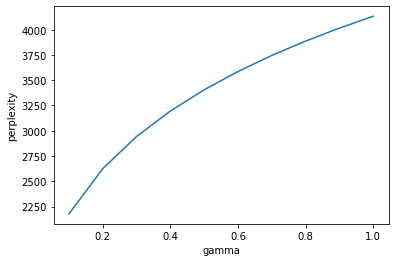

In [278]:
print(perplexity_results)
plt.plot(perplexity_results.keys(), perplexity_results.values())
plt.xlabel('gamma')
plt.ylabel('perplexity')

we can see that we get the best preplexity when gamma is the smallest , meaning we will use gamma = 0.1.

<a name="overfit"></a>
<h4>1.3.3 Perplexity according to the order of the n-gram model</h4>

Another way to improve the model is to use an n-gram model with increasing values of n (2,3,...10).

In [279]:
# Draw a graph of the obtained perplexity on the validation dataset for different values of n between 2 and 20
# for the best value of gamma obtained above.
perplexity_results_n_gram = {}
max_iter = 10
gamma = 1
valid_tokens_with_padding = add_padding(valid_tokens)
for i in range(2, max_iter + 1):
    lidstone_lm = train_word_lm(train_tokens, n=i, estimator=nltk.LidstoneProbDist, bins=vocabulary_size, gamma=0.1)
    perplexity_results_n_gram[i] = perplexity(lidstone_lm, i, valid_tokens_with_padding)

{2: 2176.860464522929, 3: 5173.614758248297, 4: 7090.420590210644, 5: 8012.935911462408, 6: 8481.667891320034, 7: 8757.659397217209, 8: 8946.213476460991, 9: 9083.60772410707, 10: 9186.278663387231}


Text(0, 0.5, 'perplexity')

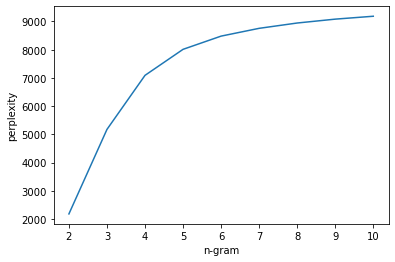

In [280]:
print(perplexity_results_n_gram)
plt.plot(perplexity_results_n_gram.keys(), perplexity_results_n_gram.values())
plt.xlabel('n-gram')
plt.ylabel('perplexity')

we can see that we got the best result for 2-gram model.

<a name="test-lm"></a>
<h4>1.3.4 Test the best n-gram LM</h4>

Based on the 2 graphs above, we hypothesize that the best combination LM is an n-gram of order NN smoothed with Lidstone estimator with parameter gamma = 0.1.

We test this model on the test dataset of the Penn Treebank and obtain the following perplexity on the validation set:

In [281]:
## Test LM with optimal parameters - report perplexity on validation.
lidstone_lm = train_word_lm(train_tokens, n=2,  estimator=nltk.LidstoneProbDist, bins=vocabulary_size, gamma=0.1)
test_tokens_with_padding = add_padding(test_tokens)
print('perplexity on the valid set {}'.format(perplexity(lidstone_lm, 2, test_tokens_with_padding)))

perplexity on the valid set 2197.8393203748356


we can see that we got simmilar results for the valididation set and the test set of the ptb.

We also test our n-gram model with the <a href="https://www.nltk.org/api/nltk.html#nltk.probability.SimpleGoodTuringProbDist">Good-Turing estimator instead of the Lidstone estimator.

In [282]:
## Test LM with Good-Turing estimator - report perplexity.
simple_good_turing_lm = train_word_lm(train_tokens, n=2, estimator=nltk.SimpleGoodTuringProbDist, bins=1e5)
train_tokens_with_padding = add_padding(train_tokens)
print('perplexity on the test set {}'.format(perplexity(simple_good_turing_lm, 2, train_tokens_with_padding)[0]))

C:\Users\Dani\miniconda3\envs\nlp21\lib\site-packages\nltk\probability.py:1456: UserWarning: SimpleGoodTuring did not find a proper best fit line for smoothing probabilities of occurrences. The probability estimates are likely to be unreliable.
  warnings.warn(


OverflowError: (34, 'Result too large')

we can see that we got overflow warning on the train set, lets try to understund why, we will change our perplexity function alittle bit:

In [283]:
def entropy(lm , n, text):
    e = 0.0
    zero_probs = []
    for i in range(len(text) - n):
        context = tuple(text[i : i + n])
        token = text[i + n]
        if lm[context].prob(token) == 0.0:
            zero_probs.append((context, token, lm[context]))
        else:
            e -= lm[context].logprob(token)
    return e / float(len(text) - (n - 1)), zero_probs

def perplexity(lm, n, text):
    e, zero_probs = entropy(lm, n, text)
    return pow(2.0, e), zero_probs

e, zero_probs = perplexity(simple_good_turing_lm, 2, train_tokens_with_padding)
print(len(train_tokens_with_padding))
print(len(zero_probs))

887523
341988


lets check how many samples each of those items have:

Counter({1: 190174, 2: 60432, 3: 31989, 4: 19468, 5: 12540, 6: 8256, 7: 5796, 8: 3736, 9: 2808, 10: 2320, 11: 1067, 12: 996, 13: 715, 14: 462, 15: 360, 17: 221, 16: 192, 18: 162, 19: 133, 20: 80, 23: 46, 35: 35})


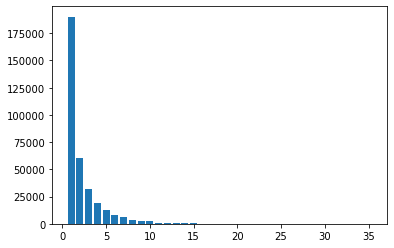

In [284]:
probs_counter = Counter([len(zero_prob[2].samples()) for zero_prob in zero_probs])
plt.bar(probs_counter.keys(), height=probs_counter.values())
print(probs_counter)

just like expected alot of those items have only 1 sample, but alot of those also have some other samples. from the farmula we can see that it's not the number of samples but there frequency, lets check if there are any items which some word appears more than once(also i checked if the predicted word is in the samples, it should have been because we check our model on the training data):

In [285]:
counter = 0
for zero_prob in zero_probs:
    if zero_prob[1] in zero_prob[2].samples() and len(zero_prob[2].samples()) == len(set(zero_prob[2].samples())):
        counter += 1
print(counter)

341988


we can see that all the words appear only once in each item, and it causes some kind of problem with the good turing estimator.
we will define new model, that model will use the good turing estimator but when there arn't any samples with more then one appearence it will return just random sample from our dataset with probability 1/N.

In [290]:
class SmoothedSimpleGoodTuringDist():
    
    def __init__(self, freqdist, size):
        self.vocabulary_size = size
        self.estimator = nltk.SimpleGoodTuringProbDist(freqdist, bins=1e5)
    
    def prob(self, sample):
        if len(self.samples()) == len(set(self.samples())):
            return 1/self.vocabulary_size
        else:
            return self.estimator.prob(sample)
        
    def logprob(self, sample):
        return log(self.prob(sample))
    
    def samples(self):
        return self.estimator.samples()
        

simple_good_turing_smoothed_lm = train_word_lm(train_tokens, n=2, estimator=SmoothedSimpleGoodTuringDist, size=vocabulary_size)
test_tokens_with_padding = add_padding(test_tokens)
p, zero_prob = perplexity(simple_good_turing_smoothed_lm, 2, test_tokens_with_padding)
print(len(zero_prob))
print('perplexity on the test set {}'.format(p))

0
perplexity on the test set 592.2749637736481


now our model doesn't output perplexity of inifinity just 592, which isn't bad at all(compare to our lidstone model).

we can allready see the worst cases in our dataset , those are the cases where we have samples with only 1 frequency, in those cases the simple good turing wasn't able to output normal values , just zero.
the best perplexity i saw in google scholar was 45, which is 10 times better then what i did here, i guess neural networks works a lot better then classic lm.

<a name="gen"></a>
<h4>1.3.5 Generating Text from a Language Model</h4>

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample
sentences starting from a seed prefix, and generating each next word by sampling from the model distribution $p(w | prefix)$.

Discuss ways to decide when the generation should stop.

In [294]:
# Define generate(model, seed) 
# Test generate it on the best model trained above
import numpy as np

vocabulary = set(train_tokens)

def generate(model, seed, n):
    random_number = np.random.randint(1000)
    out = seed
    new_seed = add_padding(seed, n)
    for _ in range(random_number):
        if len(model[tuple(new_seed)].samples()) == 0 :
            new_word = np.random.choice(list(vocabulary))
        else:
            new_word = model[tuple(new_seed)].generate()
        new_seed = new_seed[1:]
        new_seed.append(new_word)
        out.append(new_word)
    return ' '.join(out)
    
print(generate(simple_good_turing_smoothed_lm, ["He", "is"], 2))

He is rear bat kerry ship specialize commission penney dominate livestock hectic bankrupt reminder swiss intends supply market effective espectador injection rigid snow text part worked helm smaller shaking arab jackets fans waxman railroad innovative faculty baker unexpectedly addressed municipal newest breeding ancient ex-dividend retailer growth negligible heroes bonds birthday tokyo-based crushed route evacuation sr. member gardens demonstrators roller indeed help harm processors on-site unfairly streak democracy burst irish tremendous mesa upjohn estimates disorders hiroshima cars decliners barclays earlier rail composite morning assault specifically league eaton con 1960s regarding demand concentration statutory assured hours reflection nervous looming artists risc read vivid devote perjury diaper delicious dealings transmission exceptionally poor records wellcome key picked titanium usually reputation senators restrain tva royal passenger circulated believe does principal lets d

In [288]:
print(generate(lidstone_lm, ["He", "is"], 2))

IndexError: Cannot choose from an empty sequence

When we sample from the LM given a history, we do not pick the most likely word generated by the LM, otherwise the generator would be deterministic.  Instead, we use <a href="https://www.nltk.org/api/nltk.html#nltk.probability.ProbDistI.generate">nltk.ProbDistI.generate()</a>.  
* Explain what is expected from this method of text generation.

We experiment with a variety of seeds.  

We first test the case where ....

Then the case where ....

Analyze your observations.

<h4>Optional material</h4>

One way to control the variety of the text generated by an LM is to introduce a parameter called the <i>temperature</i>
of the generator which allows us to sample words randomly according to the distribution produced by the LM (that is, we do not 
always select the most likely candidate - we sample from the distribution produced by the LM).  
    
<a href="https://nlp.stanford.edu/blog/maximum-likelihood-decoding-with-rnns-the-good-the-bad-and-the-ugly/">Maximum Likelihood Decoding with RNNs - the good, the bad, and the ugly</a> by Russell Stewart (2016) explains how a temperature argument can control the level of variability generated by the model.  

The idea is ... (summarize the post).

<a href="https://github.com/sameersingh/uci-statnlp/blob/master/hw2/generator.py">generator.py</a> from Sameer Sing demonstrates a method to generate from a LM with a temperature parameter.  

Explain how the code in this method corresponds to the mathematical explanation provided in the blog above.

<a name="nn-lm"></a>
<h3>1.4 Character language model</h3>

It is interesting to compare word-based and character-based language models.
On the one hand, character-based models need to predict a much smaller range of options (one character out of ~100 possible characters vs. one word out of 200K possible words - or 10K in the example we reviewed above).  
On the other hand, we need to maintain a much longer history of characters to obtain a significant memory of the context which would make sense semantically.


<a name="effectiveness"></a>
<h4>1.4.1 Read and Summarize</h4>

<h5>1.4.1.1 <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">The Unreasonable Effectiveness of Recurrent Neural Networks</a>, May 21, 2015, Andrej Karpathy </h5>

The article’s author claims that RNNs have surprising power for NLP tasks – acting as character level language model.

The uniqueness of RNNs over other neural networks is because they work on sequences of inputs – if we think of RNN as a function, the result of the function is not dependent only on the current input, but on all previous inputs. Therefore, they have more power over regular LMs, which are based on N-grams, with a fixed amount of previous word taken into account (while RNNs can take all history into account).

Since the author used RNNs as LMs, he can generate words, from given history. That’s way he generated not only words, but whole articles, in different styles, and even almost-perfect structured text, like LaTeX and even “Linux” source code.

We know that according to Chomsky's hierarchy of languages the most expressive languages are recursively enumerable languages, which can be modeled by a Turing Machine. RNNs have only finite memory, therefore, they can be thought of them as FSMs, capable of handling only regular languages. Thus, it’s quite surprising that RNNs can “know” arbitrary languages.

It’s interesting that the author of the article is working on character level; while according to what we’ve learnt we would have expected better results with word based RNNs. He briefly mentions that “Currently it seems that word-level models work better than character-level models, but this is surely a temporary thing.” We don’t understand this claim, and we are not sure that it proved itself to be true.


<h5>1.4.1.1 The follow-up article: The unreasonable effectiveness of Character-level Language Models (and why RNNs are still cool) </h5>
<a href="http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139">The unreasonable effectiveness of Character-level Language Models (and why RNNs are still cool)</a>, Sept 2015, Yoav Goldberg.  

In this article Goldberg claims that there’s actually nothing special about most of the results shown by the “The Unreasonable Effectiveness of Recurrent Neural Networks” article. The generative power of traditional n-grams based LMs, with order of no more than 10, is already impressing, and generates nice and readable texts. The RNNs aren’t worse; but neither are they better in that aspect. Thus, “The Unreasonable Effectiveness of Recurrent Neural Networks” examples of Paul Graham’s style texts, or Shakespearean style text, have nothing really new in them, and Goldberg demonstrates his own “new” Shakespearean text.

However, the thing that is really impressing about RNNs isn’t their mere power of generating text, but their power of generating structured text, such as the Linux code example. When he tried to generate similar code with LMs, it miserably failed with order of 10 (that was good enough to create “a new Shakespeare text”) , and even with order of 20, it created better results, but still failed with things like indentation and brackets – which RNNs done pretty much OK. That’s the point where RNNs “memory” gave much better results than the LMs “short memory”. Thus, in structured text RNNs excels and indeed worthy the “Unreasonable Effectiveness” title.


<a name="recipes"></a>
<h4>1.4.2 Recipes with a Character LM</h4>

Strikingly realistic output can be generated when training a character language-model on a strongly-constrained genre of text like cooking recipes.
Train your n-gram model on the dataset provided in 
<a href="https://gist.github.com/nylki/1efbaa36635956d35bcc">do androids dream of cooking?</a> which contains about 32K recipes gathered from the Internet.

Gather the recipes dataset and prepare a dataset reader according to the structure of the files.

In [ ]:
dataset = []
for (dirpath, dirnames, filenames) in os.walk('../data/recipes_dataset'):
    for file in filenames:
        with open(os.path.join('../data/recipes_dataset', file), encoding='utf-8', errors='ignore') as file:
            dataset.append(file.read())
print(dataset[0][:1685])

we can see that a recipe starts with MMMMM---- and ends with MMMMM , we need to construct an expression which captures this pattern

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('MMMMM-----.*?MMMMM$')
recipies = []
for recipe in dataset:
    recipies.extend(tokenizer.tokenize(recipe))
print(recipies[0])

Report basic statistics about the dataset (number of recipes, tokens, characters, vocabulary size, distribution of the size of recipes in words and in chars, distribution of length of words).

In [ ]:
print('number of recipes is the data set : {}'.format(len(recipies)))
tokenized_recipies = []
for recipe in recipies:
    tokenized_recipies.append(WhitespaceTokenizer().tokenize(recipe))
number_of_tokens = sum([len(recipe) for recipe in tokenized_recipies])
print('number of tokens in the dataset : {}'.format(number_of_tokens))

In [ ]:
vocabulary_size = len(set([y for x in tokenized_recipies for y in x]))
print(vocabulary_size)

we can see that we got a huge number, and that is beacuse we didnt do any preprocessing to dataset, in order to currectly measure the vocabulary size , we need to remove numbers and special chars and also lower the strings so there wont be any diffrence between the and The.

In [ ]:
import re
lower_recipies = [y.lower() for x in tokenized_recipies for y in x]
without_special_char = set([re.sub('[^A-Za-z]+', '', string) for recipe in tokenized_recipies for string in recipe])
vocabulary_size = len(without_special_char)
print(vocabulary_size)

In [ ]:
number_of_chars = set(x for recipe in tokenized_recipies for string in recipe for x in string)
print(len(number_of_chars))

In [ ]:
average_words_in_recipe = sum([len(recipe) for recipe in tokenized_recipies]) / len(tokenized_recipies)
print(average_words_in_recipe)
std_words_in_recipe = np.std([len(recipe) for recipe in tokenized_recipies])
print(std_words_in_recipe)

In [ ]:
average_chars_in_recipe = sum([len(word) for recipe in tokenized_recipies for word in recipe]) / len(tokenized_recipies)
print(average_chars_in_recipe)
std_chars_in_recipe = np.std([sum([len(word) for word in recipe]) for recipe in tokenized_recipies])
print(std_chars_in_recipe)

In [ ]:
average_length_of_words_in_recipe = sum([len(word) for recipe in tokenized_recipies for word in recipe]) / number_of_tokens
print(average_length_of_words_in_recipe)
std_length_of_words_in_recipe = np.std([len(word) for recipe in tokenized_recipies for word in recipe])
print(std_length_of_words_in_recipe)

Split the dataset into training, dev and test as a 80%/10%/10% split.  Provide a Python interface to access the split conveniently.

In [ ]:
def split_dataset(dataset):
    random.shuffle(dataset)
    train_size = math.ceil(0.8 * len(dataset))
    valid_size = math.ceil(0.1 * len(dataset)) + train_size
    train = dataset[:train_size]
    valid = dataset[train_size: valid_size]
    test = dataset[valid_size:]
    return train, valid, test

train, valid, test = split_dataset(recipies)
print(train[0])

Choose the order of the char n-gram according to the indications given in Yoav Goldberg's article.  
Justify the choice (you should use the dev test for this).

from yoav goldberg's article i learned that we need to choose n which is larger then 4 but there isn't really a formula of chosing it , we try and if it doesn't work than we increase n to somthing larger

Train a char language model using your LM mode adapted to work on characters instead of words.

we will start with n = 4 , lets see the generated result. one importent detail is after some trail and error i found out that i get the best result if i use padding on each recipe, by that the model seems to learn some kind of structure of the recipe.

In [ ]:
def combine_recipies(dataset):
    return [char for recipe in dataset for char in recipe]

def tokenize_recipe(recipe):
    return [char for char in recipe]

def prepare_recipe_dataset(dataset, n):
    dataset_with_padding = []
    for recipe in dataset:
        dataset_with_padding.append(add_padding(tokenize_recipe(recipe), n))
    combined_recipies = combine_recipies(dataset_with_padding)
    return [(tuple(combined_recipies[i : i + n]), combined_recipies[i + n]) for i in range(len(combined_recipies) - n)]

def train_char_lm(dataset, n, estimator=nltk.MLEProbDist, **kwargs):
    char_grams = prepare_recipe_dataset(dataset, n)
    return create_lm(char_grams, estimator, **kwargs)
    
def generate_samples(lm, n, letters):
    hist = ['*' for i in range(n)]
    out = []
    for _ in range(letters):
        word = lm[tuple(hist)].generate()
        hist = hist[1:]
        hist.append(word)
        out.append(word)
    return ''.join(out)

n = 4
lm = train_char_lm(train, n=n)
print(generate_samples(lm, n, 2000))

it's readable but still doesn't look good, the structure is all wrong , lets try n = 7:

In [ ]:
n = 7
lm_7 = train_char_lm(train, n=n)
print(generate_samples(lm_7, n, 2000))

this one looks alot better then the previos one but we still get some syntax errors, lets try n=10:

In [ ]:
n = 10
lm_10 = train_char_lm(train, n=n)
print(generate_samples(lm_10, n, 2000))

we can see that the best result is with n=10, the stracture looks good and readable.

Report on the perplexity of the trained language model.  Comment on the value you observe compared to the perplexity of the word LM model obtained above.

In [ ]:
valid_dataset = prepare_recipe_dataset(valid, 10)
print('perplexity with n=7 is {}'.format(perplexity(lm_10, 10, valid_dataset)))

we can see that we got bad results because we didn't use smoothing, we will use lidstone estimator now.

In [ ]:
n = 10
lm_10 = train_char_lm(train, n=n, estimator=nltk.LidstoneProbDist, bins=99, gamma=0.1)
print(generate_samples(lm_10, n, 2000))

In [ ]:
valid_dataset = prepare_recipe_dataset(valid, 10)
print('perplexity with n=10 is {}'.format(perplexity(lm_10, 10, valid_dataset)))

well the number seems kind of low, but we know that we have about 200 options, if we choose randomly we will get a number which is pretty close to that one, so the results are not great.

Sample about 5 generated recipes from the trained language model.

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('MMMMM-----.*?MMMMM')
generated_recipies = generate_samples(lm_10, 10, 4000)
generated_recipies = tokenizer.tokenize(generated_recipies)
for i in range(5):
    print(generated_recipies[i])

Write 3 to 5 observations about the generated samples.

1. we can see that the char model was able to capture the structure of the recipie which is quite impressive(for me at list i thought that only rnn will be able to do somthing like that)
2. we can see that it uses random numbers from there to there which is nice, it makes to recipe look more realistic.
3. the model add sufix like Posted By , and Shared by which which also make the recipe looks more realistic.
4. somtimes the instructions doesn't make sense but it's readable and looks man made.
5. somtimes we get recipe with only 1 line, which doesn't make any sense.

<hr>
<hr>
<a name="P2"></a>
<h2>Part 2: Polynomial Curve Fitting</h2>

We reproduce the polynomial curve fitting example used in Bishop's <a href="https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book">book</a> in Chapter 1.  

<a name="syntheticdata"></a>
<h3>2.1 Synthetic Dataset Generation</h3>

We generate a dataset of points in the form of 2 vectors $x$ and $t$ of size $N$ where:

$t_i = y(x_i) + \mathcal{N}(\mu, \sigma)$

where:
* The $x_i$ values are equi-distant on the $[0 \dots 1]$ segment (that is, $x_1 = 0, x_2=\frac{1}{N-1}, x_3=\frac{2}{N-1}..., x_N = 1.0$)
* $\mu = 0.0$
* $\sigma = 0.03$ 
* $y(x) = sin(2\pi \times x)$

we will create our y(x)(which in the example is f(x)) , and we will use it the generate the dataset and add some noise using normal distribution.
as suggested we will use np.random to generate random number in normal distribution and we will use linspace to generate N equal segments in some define space, in our example [0-1]

In [248]:
# Learn the function y given the generated noisy dataset
def f(x): 
    return math.sin(2 * math.pi * x)

def generateDataset(N, f, sigma):
    t = []
    x = np.linspace(0.0, 1.0, N)
    s = np.random.default_rng().normal(0, sigma, N)
    for i in range(0, N):
        t.append(f(x[i]) + s[i])
    return x,t

lets check that our function works, we will plot the generated dataset using the scatter option, which just plots the points without adding some line to them.

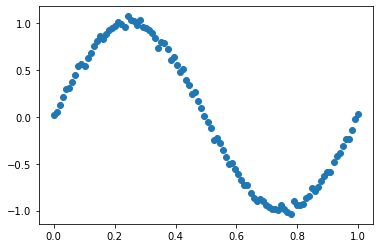

In [249]:
x,t = generateDataset(100, f, 0.03)
plt.scatter(x,t)

<a name="curvefitting"></a>
<h3>2.2 Polynomial Curve Fitting</h3>

We will attempt to learn the function y given a synthetic dataset $(x, t)$.

We assume that $y$ is a polynomial of degree $M$ - that is:

$y(x) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M$

Our objective is to estimate the vector $w = (w_0 \dots w_M)$ from the dataset $(x, t)$.

We implement a method <b>optimizeLS(x, t, M)</b> which given the dataset $(x, t)$ returns the optimal polynomial of degree $M$ that approximates the dataset according to the least squares objective. 

In [250]:
def calculate_design_matrix(x, M):
    design_m = np.zeros((len(x), M + 1))
    for i in range(len(x)):
        for j in range(0, M + 1):
            design_m[i][j] = pow(x[i], j)
    return design_m

def optimizeLS(x, t, M):
    design_m = calculate_design_matrix(x, M)
    w = np.dot(design_m.T, design_m)
    w = np.linalg.inv(w)
    w = np.dot(w, design_m.T)
    w = np.dot(w, t)
    return w

We now plot the learned polynomial $w_M(x_i)$ and the real function $sin(2πx)$ for a dataset of size $N=10$ and $M=1,3,5,10$.


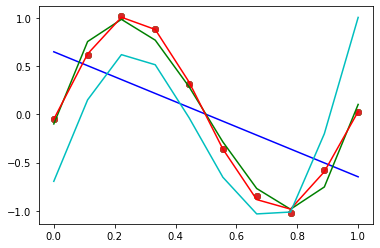

In [251]:
x,t = generateDataset(10, f, 0.03)
M = [1,3,5,10]
colors = ['b', 'g', 'r', 'c']
for i in range(len(M)):
    coeffs = optimizeLS(x,t,M[i])
    plt.scatter(x, t)
    y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
    plt.plot(x, y, color=colors[i])

from that plot we can see that when M=1 we just get a stright line, as expected which isn't that great in our example because our function is sin(2x).
M=3,5 are equally good maybe M=5 is doing a better job, we will have to check the mean error to detemine that one.
M=10 doesnt really fit the points , just like M=1 , probably because the degree is too high.

<a name="regularization"></a>
<h3>2.3 Polynomial Curve Fitting with Regularization</h3>

We observe in the plot above that the solution to the least-squares optimization has a tendency to over-fit the dataset.

To avoid over-fitting, we will use <i>regularization</i>: the objective function we want to optimize will take into account the least-squares error as above, and in addition the complexity of the learned model $w$.

We write a function <b>optimizePLS(x, t, M, lambda)</b> which returns the optimal parameters $w_{PLS}$ given $M$ and $\lambda$.

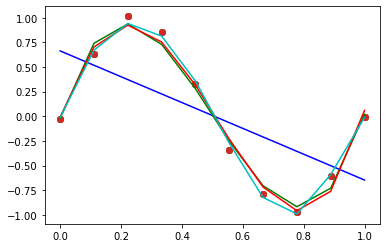

In [252]:
def optimizePLS(x, t, M, lamb):
    design_m = calculate_design_matrix(x, M)
    w = np.dot(design_m.T, design_m)
    w = w + (np.identity(M + 1) * lamb)
    w = np.linalg.inv(w)
    w = np.dot(w, design_m.T)
    w = np.dot(w, t)
    return w

def calculatePointsFromCoef(coeffs, x):
    return np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])

x,t = generateDataset(10, f, 0.03)
M = [1,3,5,10]
colors = ['b', 'g', 'r', 'c']
for i in range(len(M)):
    coeffs = optimizePLS(x,t,M[i], 0.0001)
    plt.scatter(x, t)
    y = calculatePointsFromCoef(coeffs, x)
    plt.plot(x, y, color=colors[i])

after we use regularization we can see that the lines gets a better fit to the dataset, we can clearly see now that the lines we draw before were over fiting.

We want to optimize the value of λ. The way to optimize is to use a development set in addition to our training set.

To construct a development set, we extend our synthetic dataset construction function to return 3 samples:
* one for training, 
* one for development 
* and one for testing

In [253]:
def generateSet(N, f, sigma, x):
    t = []
    s = np.random.default_rng().normal(0, sigma, N)
    for i in range(0, N):
        t.append(f(x[i]) + s[i])
    return t
    
def generateDataset3(N, f, sigma):
    x = numpy.linspace(0.0, 1.0, 3 * N)
    np.random.default_rng().shuffle(x)
    x_train, x_valid, x_test = np.split(x, 3)
    return (x_train, generateSet(N, f, sigma, x_train)), (x_valid, generateSet(N, f, sigma, x_valid)), (x_test, generateSet(N, f, sigma, x_test))

ok now that we have are splitted datasets , we now want to optimize the paramater lamb, we will do that by trying diffrent values from log(lamb) = [-40 - (-20)].
but first before we can even check which is a better fit we need to denote some new function, which is the MSE(mean squared error) and it means, how much did i mistake in each prediction from the original point. 
the calculation of the MSE(y, y') where y is vector of size N of the test points and y' is vector of size N of the predicted results, is as follows : \begin{equation} MSE(x, x') = \frac{1}N * \sqrt{(x - x') ^ 2} \end{equation}

In [254]:
def calculateMeanError(coeffs, xv, tv):
    estimated_points = calculatePointsFromCoef(coeffs, xv)
    return np.sqrt(np.sum(np.power((tv-estimated_points),2))) / len(xv)

def calculate_mse_for_lambs(xt, tt, xv, tv, xtest, ttest, M):
    train_errors = []
    valid_errors = []
    test_errors = []
    lambs = []
    for i in range(-40, -20):
        lamb = pow(2, i)
        coeffs = optimizePLS(xt, tt, M, lamb)
        lambs.append(lamb)
        train_errors.append(calculateMeanError(coeffs, xt, tt))
        valid_errors.append(calculateMeanError(coeffs, xv, tv))
        test_errors.append(calculateMeanError(coeffs, xtest, ttest))
    return lambs, train_errors, valid_errors, test_errors

ok after we defined those functions lets check for a simple dataset N=10 , with M=3 for the change in train, valid, test error while changing log(lamb) = [-40 - (-20)].

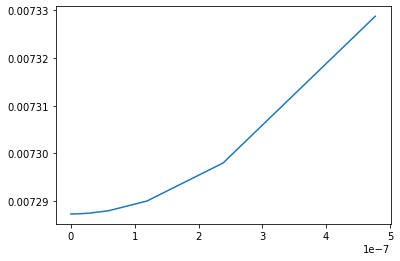

In [255]:
train_set, valid_set, test_set = generateDataset3(10, f, 0.03)
xt, tt = train_set
xv, tv = valid_set
x_test, t_test = test_set
lambs, train_errors, valid_errors, test_errors = calculate_mse_for_lambs(xt, tt, xv, tv, x_test, t_test, 3)
plt.plot(lambs, train_errors)

this is not surprising, when lamb gets bigger also the error on the train gets bigger but lets check if the error on the valid and test gets smallers.

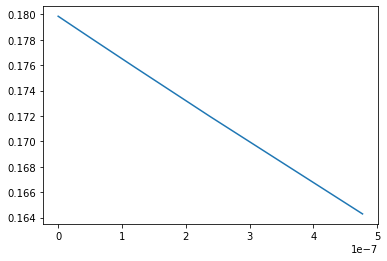

In [256]:
plt.plot(lambs, valid_errors)

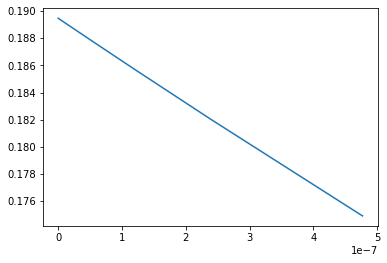

In [257]:
plt.plot(lambs, test_errors)

we can cleary see that the error on the valid and test set, gets smaller when we increase lamb.
lets check if that also holds true for a bigger dataset, for N=100.

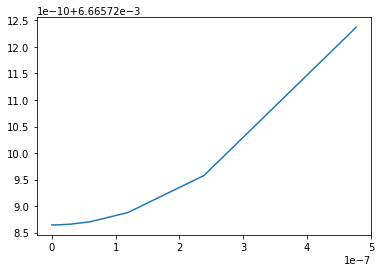

In [262]:
train_set, valid_set, test_set = generateDataset3(100, f, 0.03)
xt, tt = train_set
xv, tv = valid_set
x_test, t_test = test_set
lambs, train_errors, valid_errors, test_errors = calculate_mse_for_lambs(xt, tt, xv, tv, x_test, t_test, 3)
plt.plot(lambs, train_errors)

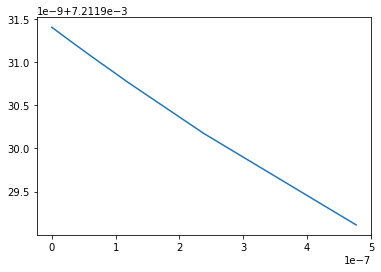

In [263]:
plt.plot(lambs, valid_errors)

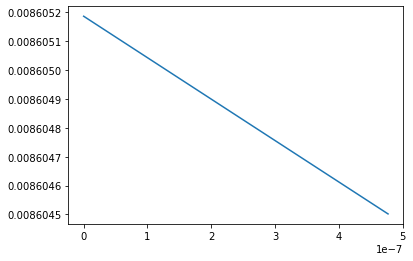

In [264]:
plt.plot(lambs, test_errors)

from the plots above we can cleary see that when the lambda paramter is bigger then the error on the train set gets bigger, but the error on the validation set and the test set is smaller.
we can see that the model can generalized better on data he didn't see before thanks to the regularization which prevents the overfitting of the model.
we will now intrduce new function optimizePLS2, this function try diffrent lambs, compare between them and return the best lamb using the MSE intruducted before on validation set.

In [265]:
def optimizePLS2(xt, tt, xv, tv, M):
    best_error = 10000
    best_lamb = 0.0
    for i in range(-40, -20):
        lamb = pow(2, i)
        coeffs = optimizePLS(xt, tt, M, lamb)
        new_error = calculateMeanError(coeffs, xv, tv)
        if new_error < best_error:
            best_error = new_error
            best_lamb = i
    return best_lamb

optimizePLS2(train_set[0], train_set[1], valid_set[0], valid_set[1], 3)

-21

the best lamb is $2^{-21}$

<a name="prob-regr"></a>
<h3>2.4 Probabilistic Regression Framework</h3>

We now consider the same problem of regression (learning a function from a dataset) formulated in a probabilistic framework.

we will now calculate the bayesian Estimator which calculate the mean and the verience of each point x using the distribution of the train dataset.

In [266]:
def Mean(x, sigma2, design_m_train, t_train, M, S):
    design_m = calculate_design_matrix(x, M)
    m = np.matmul(design_m_train.T, t_train)
    m = np.dot(S, m)
    m = np.dot(design_m, m)
    return (1/sigma2) * m.T

def Var(x, sigma2, M, S):
    design_m = calculate_design_matrix(x, M)
    v = np.dot(S, design_m.T)
    v = np.dot(design_m, v)
    return v + sigma2


def calculate_sum_vector(m, t, N):
    return np.sum([np.dot(m[i,:], t[i]) for i in range(0, N)])

def calculate_sum_matrices(m, t, N):
    print(m[i,:])
    print(t[:,i])
    return np.sum([np.dot(m[i,:], t[:,i]) for i in range(0, N)])

def bayesianEstimator(x, t, M, alpha, sigma2):
    t = np.array(t)
    design_m = calculate_design_matrix(x, M)
    s =  np.linalg.inv((np.identity(M + 1) * alpha) + ((1/sigma2) * np.matmul(design_m.T, design_m)))
    m = lambda x: Mean(x, sigma2, design_m, t, M, s)
    v = lambda x: Var(x, sigma2, M, s)
    return m, v

We draw the plot of the original function $y = sin(2πx)$ over the range $[0 \dots 1]$, the mean of the predictive distribution $m(x)$ and the confidence interval $m(x) - \sqrt{var(x)}$ and $m(x) + \sqrt{var(x)}$ (that is, one standard deviation around each predicted point) for the values:
* $\alpha = 0.005$
* $\sigma^2 = 1/11.1$
* $M = 9$

over a synthetic dataset of size $N=10$ and $N=100$.

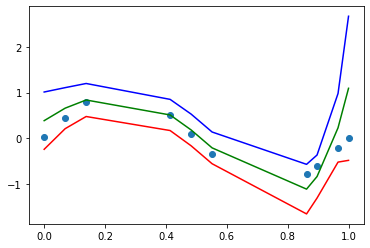

In [267]:
def calculate_point_from_mean_and_variance(M, m, v, x):
    result = []
    for j in x:
        point = m([j])
        var = v([j])
        result.append((point[0], point[0] + np.sqrt(var[0]), point[0] - np.sqrt(var[0])))
    return result


train_set, valid_set, test_set = generateDataset3(10, f, 0.03)
xt, tt = train_set
xv, tv = valid_set
x_test, t_test = test_set
m, v = bayesianEstimator(xt, tt, 9, 0.005, 1/11.1)
sorted_xv = sorted(xv)
y = calculate_point_from_mean_and_variance(9, m, v, sorted_xv)
plt.scatter(xv, tv)
plt.plot(sorted_xv, [point[0] for point in y], color='g')
plt.plot(sorted_xv, [point[1] for point in y], color='b')
plt.plot(sorted_xv, [point[2] for point in y], color='r')

from the plot we can see the the this estimator fits the data well for the validation set , lets check it on the training set.

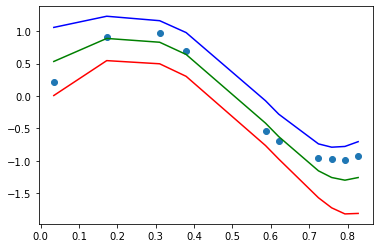

In [268]:
sorted_xtest = sorted(x_test)
y = calculate_point_from_mean_and_variance(9, m, v, sorted_xtest)
plt.scatter(x_test, t_test)
plt.plot(sorted_xtest, [point[0] for point in y], color='g')
plt.plot(sorted_xtest, [point[1] for point in y], color='b')
plt.plot(sorted_xtest, [point[2] for point in y], color='r')

because we have very small dataset N=10, we can see that the line doesn't look like sin(2x) at all, lets see if when N=100 we can get better results.

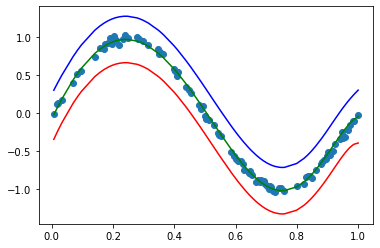

In [269]:
train_set, valid_set, test_set = generateDataset3(100, f, 0.03)
xt, tt = train_set
xv, tv = valid_set
x_test, t_test = test_set
m, v = bayesianEstimator(xt, tt, 9, 0.005, 1/11.1)
sorted_xv = sorted(xv)
y = calculate_point_from_mean_and_variance(9, m, v, sorted_xv)
plt.scatter(xv, tv)
plt.plot(sorted_xv, [point[0] for point in y], color='g')
plt.plot(sorted_xv, [point[1] for point in y], color='b')
plt.plot(sorted_xv, [point[2] for point in y], color='r')

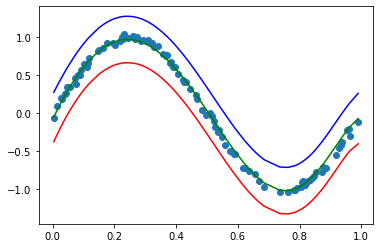

In [270]:
sorted_xtest = sorted(x_test)
y = calculate_point_from_mean_and_variance(9, m, v, sorted_xtest)
plt.scatter(x_test, t_test)
plt.plot(sorted_xtest, [point[0] for point in y], color='g')
plt.plot(sorted_xtest, [point[1] for point in y], color='b')
plt.plot(sorted_xtest, [point[2] for point in y], color='r')

this line looks alot better from before because we got alot of training examples and mean can return the real distribution of points.

Interpret the height of the band around the most likely function in terms of the distribution of the xs in your synthetic dataset.
Can you think of ways to make this height very small in one segment of the function and large in another?

from the given formula we can see that the var does depend on some x, but also on S which is a matrix calculate over the entire dataset. in order to make one segment very small then the other we need to somehow change the formula to also compose x and t

<hr/>
<hr/>
<a name="P3"></a>
<h2>Part 3: Neural Models for Classification</h2>

In this section, we adopt the PyTorch tutorial on 
<a href="https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html">Character RNN for classification</a>
to a different dataset.

<a name="readtut"></a>
<h3>3.1 Summarize the Tutorial</h3>

We summarize the <a href="https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html">PyTorch tutorial</a>:
* task
* method
* data encoding
* loss function 
* evaluation method

(Reading <a href="https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html">PyTorch Tensor Tutorial</a> helps)

<a name="newdata"></a>
<h3>3.2 Explore City Names Dataset</h3>

We use a dataset on city names in different countries to train a classifier.

The data from <a href="cities_val.zip">cities_val.zip</a> (validation) and <a href="cities_train.zip">cities_train.zip</a> (training)
is under "../data/cities/val" and "../data/cities/train".


In [271]:
import codecs
import math
import random
import string
import time
import numpy as np
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
import torch

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_lowercase + " .,;'"
n_letters = len(all_letters)
n_categories = len(languages)

import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = languages

# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

we will now load the dataset using the prebuild functions above, we use unicode_to_ascii because we dont want to model to predict the langugue just based on diffrent chars, we want to model to be able to predict the langague based on the name of the cities.

In [272]:
for (dirpath, dirnames, filenames) in os.walk('../data/cities/train'):
    for file in filenames:
        category_lines[file.split('.')[0]] = readLines(os.path.join('../data/cities/train', file))
for x,y in category_lines.items():
    print(x,y[0])

af garavshakh
cn yungming
de rudenweiler
fi navala
fr premery
in tagegin
ir borough of cheshire east
pk angurai
za molazzana


after we loaded the dataset, we will explore the dataset and compute some basic statistics, we expect the dataset to be balanced , lets check how many citites we have in each category.

number of categories in the dataset is : 9


<BarContainer object of 9 artists>

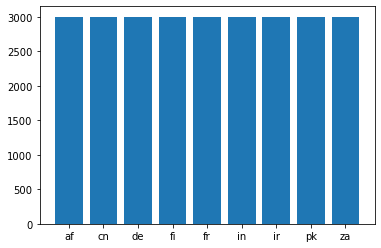

In [273]:
print('number of categories in the dataset is : {}'.format(n_categories))

cities_per_category = {x : len(y) for x,y in category_lines.items()}

plt.bar(cities_per_category.keys(), height=cities_per_category.values())

just like we expected there are the same number of citites in each category, we will now explore the number of tokens(words) in each langugue, just like the number of cities we will expect that number to be close, but since those langugue are diffrent we can expect some diffrence(+- 1000 words)

<BarContainer object of 9 artists>

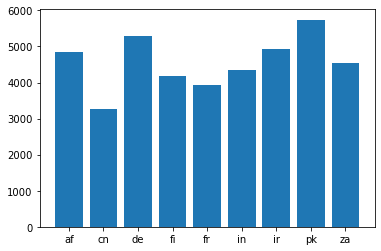

In [274]:
tokens_per_category = {x : np.sum([len(city.split(' ')) for city in y]) for x,y in category_lines.items()}
plt.bar(tokens_per_category.keys(), height=tokens_per_category.values())

well the diffrenct between cn to any other languge is pretty big, i can allready guess that the model will be able to recognize this languge more then others.
we will know check the total number of chars in each category, after senning the number of tokens we can now expect cn to have the lowest number and probably all the others will be the same.

<BarContainer object of 9 artists>

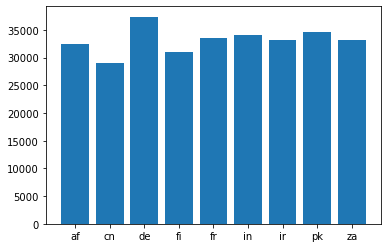

In [275]:
chars_per_category = {x : np.sum([len(city) for city in y]) for x,y in category_lines.items()}
plt.bar(chars_per_category.keys(), height=chars_per_category.values())

we can see the cn has the lowest number of characters , like expected and all the other langugues are pretty much the same.
we will now calculate the total number of disticnt chars in the dataset, from the function unicode_to_ascii we know that there are only ascii_chars so we expect that number to be 31

In [30]:
distinct_chars = set([char for cities in category_lines.values() for city in cities for char in city])
print('we have {} distinct chars in the dataset, we expect that value to be equal or lower to {}'.format(len(distinct_chars), n_letters))

we have 29 distinct chars in the dataset, we expect that value to be equal or lower to 31


we actually got only 29 chars which is quite surprising, i guess there are some chars which are not in use in those langugues.
lets check which are those chars.

In [31]:
print(set(all_letters).symmetric_difference(distinct_chars))

{';', ','}


ok so we go only those 2 special chars, which is not very surprising, so lets continue, lets calcualte the disticnt chars per category, maybe we can observe some pattern

<BarContainer object of 9 artists>

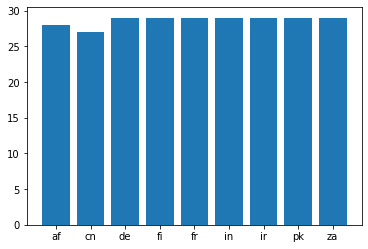

In [32]:
distinct_chars_per_category = {x : len(set([char for city in cities for char in city])) for x, cities in category_lines.items()}
plt.bar(distinct_chars_per_category.keys(), height=distinct_chars_per_category.values())

lets calculate the average number of letters in each city for each langugue, i dont have predictions about that , i just expect from before that cn will have the lowest number and de or pk will have the higest.

<BarContainer object of 9 artists>

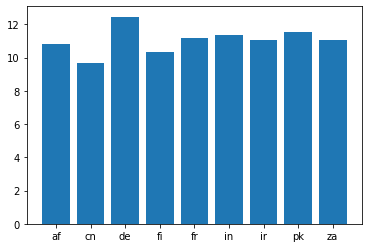

In [34]:
average_chars_per_category = {x : len([char for city in cities for char in city])/len(cities) for x, cities in category_lines.items()}
plt.bar(average_chars_per_category.keys(), height=average_chars_per_category.values())

as epected de have the largest number of letters in each city and cn have the lowest number, lets now calculate average number of words in each city

<BarContainer object of 9 artists>

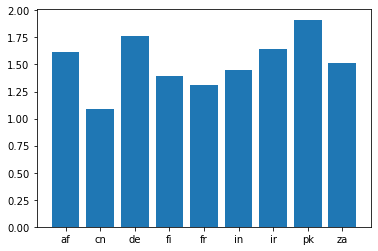

In [35]:
average_words_per_category = {x : sum([len(city.split(' ')) for city in cities])/len(cities) for x, cities in category_lines.items()}
plt.bar(average_words_per_category.keys(), height=average_words_per_category.values())

ok first of all we need to convert each letter to one hot encoding vector and then each line to array of one hot encodings.
we need to do that because it works better when each letter is orthogonal to each letter, and we dont just assign random vectors to each letter(a nerual network is just some matrix multiplication + some non linear function)

In [36]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

we will now build the rnn module, we need to inherit nn.Module and implement foward and __init__ , that is the basic interface that pytorch gives us inorder to create nn and train them.

In [43]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

ok after we defined our nn , we now need to train the model , and for the training we need to be able to sample random training example, because the gradient decent converges better that way(at list that is the general approch).

In [44]:
import random

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = fr / line = brotel
category = ir / line = kalatehye shoqaniha
category = ir / line = tirapenk
category = pk / line = zaralg kili
category = af / line = cadafais
category = fr / line = montbrunbocage
category = za / line = mbanza mussende
category = cn / line = taynin
category = fr / line = billy
category = af / line = joye qalah


we will now define our lose function which is just negative log likelihood loss, our learning rate which we set for 0.005 but we might change that if there is some overfit or underfit.
we will also define our training function which takes some example and feed it in the network, after that calculate the loss and update the params.

In [45]:
criterion = nn.NLLLoss()
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), 0.5)

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

and now we will train our network, we will do 300k iters which is about 10 epoch since we have 27k cities in our dataset.
in each iteration we will add the loss so we will plot it later to see if the network loss converages.
we will plot every 27k examples because there are 27k cities in the dataset, so we will plot every epoch.

In [46]:
import time
import math

n_iters = 300000
print_every = 5000
plot_every = 27000


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 1% (0m 8s) 2.1025 vikarheden / in ✗ (de)
10000 3% (0m 16s) 2.1572 podrzeczany / in ✗ (za)
15000 5% (0m 24s) 2.3781 san jose de tapia / fi ✗ (de)
20000 6% (0m 33s) 2.6358 merteza / fi ✗ (za)
25000 8% (0m 41s) 7.2403 san lorenzo descardazar / fr ✗ (za)
30000 10% (0m 49s) 1.1958 yanghuakengcun / cn ✓
35000 11% (0m 58s) 1.1458 staryye zazulyany / za ✓
40000 13% (1m 6s) 1.1005 gonfi k'edida / fi ✓
45000 15% (1m 15s) 1.9254 kondez / fi ✗ (de)
50000 16% (1m 23s) 1.0068 fintesti / fi ✓
55000 18% (1m 31s) 2.1041 ganga pind / cn ✗ (pk)
60000 20% (1m 40s) 0.8028 chuanyanba / cn ✓
65000 21% (1m 48s) 0.9976 alderpoint / fr ✗ (de)
70000 23% (1m 56s) 0.8237 goth maro kakepota / pk ✓
75000 25% (2m 4s) 3.6229 kockwitz / ir ✗ (de)
80000 26% (2m 13s) 1.5225 pampyoli / pk ✗ (fi)
85000 28% (2m 21s) 1.8853 narimani sofla / fi ✗ (ir)
90000 30% (2m 30s) 1.9052 platiner / fi ✗ (in)
95000 31% (2m 38s) 0.7343 wuyegong / cn ✓
100000 33% (2m 46s) 5.7028 zurchau / za ✗ (de)
105000 35% (2m 55s) 1.7973 shtufi / 

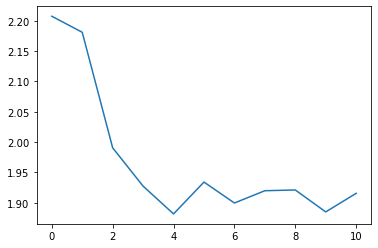

In [47]:
plt.figure()
plt.plot(all_losses)

from that graph we can see that the loss isn't converging to much , it stays around the line of 2 and somtimes go higer which means that either out network needs more layers or other regularzation methods.
let's plot the confusion matrix and see how good the network is.

<ipython-input-48-f984d1a39c33>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-48-f984d1a39c33>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


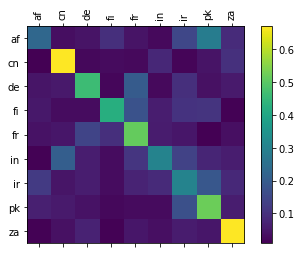

In [48]:
import matplotlib.ticker as ticker

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

from that confusion matrix we can cleary see that the network isn't preforming well enought, we will add more layers and also use drop out.

<a name="bettercitiesmodel"></a>
<h3>3.4 Improve the RNN Model (Optional)</h3>

Explore methods to improve performance of the cities classifier.
Use a character RNN, dropout, better initialization.

Report on error reduction.